# 从零实现DBSCAN

In [84]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 数据准备

In [85]:
from sklearn.datasets import make_blobs

# 生成一些样本数据
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=0.50, random_state=0)

In [86]:
X.shape

(100, 2)

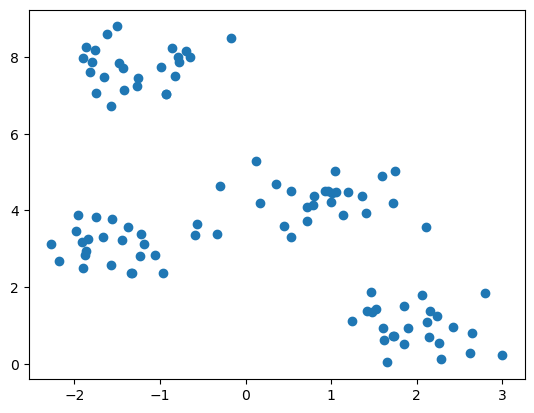

In [87]:
plt.scatter(*X.T)
plt.show()

## 2. 密度聚类

In [88]:
class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        """
        初始化DBSCAN算法的参数
        :param eps: 邻域半径
        :param min_samples: 构成一个簇的最小邻域点数
        """
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        """
        对数据进行聚类
        :param X: 输入数据，形状为 (n_samples, n_features)
        :return: 聚类标签，形状为 (n_samples,)
        """
        n_samples = X.shape[0]
        labels = np.full(n_samples, -1)  # 初始化所有点的标签为 -1（表示噪声）
        cluster_id = 0

        for i in range(n_samples):
            if labels[i] != -1:  # 如果点已经被访问过，跳过
                continue

            # 查找当前点 i 的邻域
            neighbors = self._region_query(X, i)

            if len(neighbors) < self.min_samples:
                labels[i] = -1  # 将其标记为噪声
            else:
                # 创建新的簇
                self._expand_cluster(X, labels, i, neighbors, cluster_id)
                cluster_id += 1

        return labels

    def _region_query(self, X, point_idx):
        """
        查找给定点在 eps 邻域内的所有点
        :param X: 输入数据
        :param point_idx: 当前点的索引
        :return: 邻域内点的索引列表
        """
        neighbors = []
        for i in range(X.shape[0]):
            if np.linalg.norm(X[point_idx] - X[i]) < self.eps:
                neighbors.append(i)
        return neighbors

    def _expand_cluster(self, X, labels, point_idx, neighbors, cluster_id):
        """
        扩展簇
        :param X: 输入数据
        :param labels: 点的标签数组
        :param point_idx: 当前点的索引
        :param neighbors: 邻域内点的索引列表
        :param cluster_id: 当前簇的编号
        """
        labels[point_idx] = cluster_id  # 将当前点标记为属于该簇
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]

            if labels[neighbor_idx] == -1:  # 如果邻域中的点是噪声，将其归入当前簇
                labels[neighbor_idx] = cluster_id

            elif labels[neighbor_idx] == -1:  # 如果邻域中的点未被访问过
                labels[neighbor_idx] = cluster_id
                # 查找该点的邻域
                new_neighbors = self._region_query(X, neighbor_idx)
                if len(new_neighbors) >= self.min_samples:
                    neighbors.extend(new_neighbors)  # 将新的邻域点加入扩展列表
            i += 1


In [89]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# 生成半月形数据集
X, _ = make_moons(n_samples=500, noise=0.1)

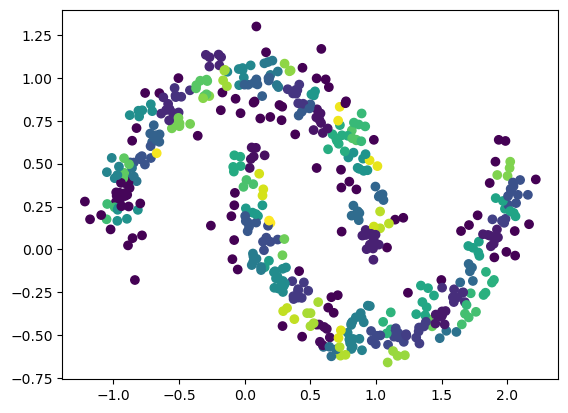

In [90]:
# 初始化DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)

# 聚类
labels = dbscan.fit(X)

# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()

In [95]:
np.unique(labels)

array([-1,  0,  1,  2,  3])

## Sklearn

In [91]:
from sklearn.cluster import DBSCAN

In [92]:
# 初始化DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
# 聚类
labels = dbscan.fit(X).labels_

In [93]:
np.unique(labels)

array([-1,  0,  1,  2,  3])

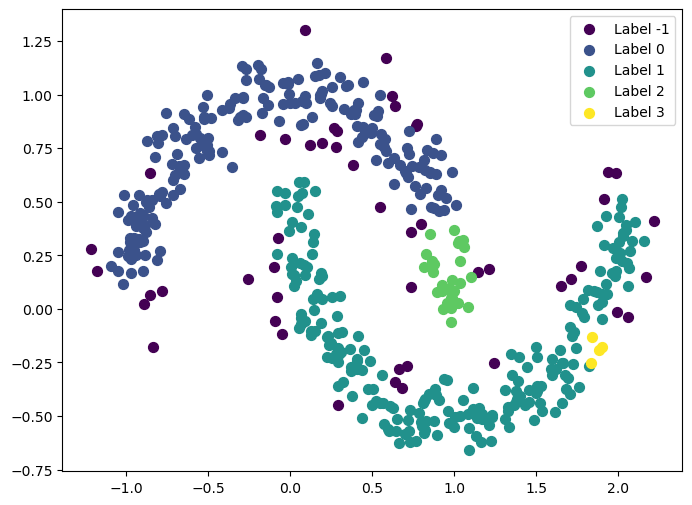

In [94]:
colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(labels))))

# 可视化结果
plt.figure(figsize=(8, 6))
for k, col in zip(np.unique(labels), colors):
    class_member_mask = (labels == k)  # 掩码，选择属于当前 label 的点
    
    # 绘制属于该簇的点
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], 
                c=[col], label=f'Label {k}', s=50)

# 添加图例，说明每个颜色对应的 label
plt.legend()
plt.show()